# Task 1 : Prediction Using Supervised Machine Learning (Simple Linear Regression)

# Author: Dimple Kaushik

# In this project, we will predict the Percentage Scores of a student based on the number of hours studied. There are two 
variables, feature is the Number of hours studied and the target value is Percentage of score. 
Lets solve it using Simple Linear Regression

# 1. Import Libraries

In [1]:
# import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2. Importing dataset

In [2]:
# Reading data from remote link
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df= pd.read_csv(url)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# 3. Exploratory Data Analysis

In [4]:
df.shape

(25, 2)

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.index

RangeIndex(start=0, stop=25, step=1)

In [8]:
df.isnull().value_counts

<bound method DataFrame.value_counts of     Hours  Scores
0   False   False
1   False   False
2   False   False
3   False   False
4   False   False
5   False   False
6   False   False
7   False   False
8   False   False
9   False   False
10  False   False
11  False   False
12  False   False
13  False   False
14  False   False
15  False   False
16  False   False
17  False   False
18  False   False
19  False   False
20  False   False
21  False   False
22  False   False
23  False   False
24  False   False>

In [9]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Let's plot our data points on a 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data.
We can create the plot with the following script

In [10]:
X=df['Hours']
y=df['Scores']

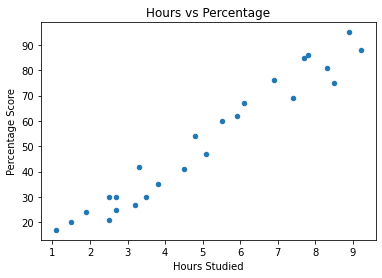

In [11]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', kind='scatter')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.title('Hours vs Percentage')  
plt.show()

# We can say that 'there is a positive linear relation between the number of hours studied and percentage of score' as evident from the graph

In [12]:
# checking correlation with Pearson method
df.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


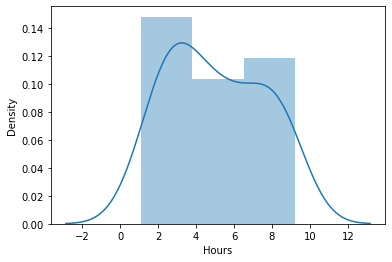

In [13]:
# Distritution of Hours
sns.distplot(df['Hours']) 
plt.show()

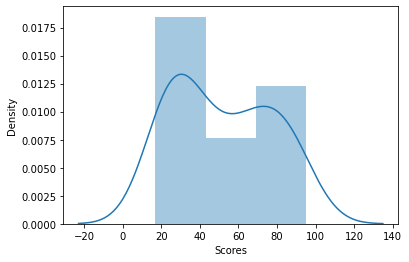

In [14]:
# Distribution of Scores
sns.distplot(df['Scores'])
plt.show()

# 4. Training the data

In [15]:
# Divide the data into "attributes" (inputs) and "labels" (outputs)
X= df.iloc[:,:-1].values
y= df.iloc[:,1].values

In [16]:
#Split the data into training and test sets. We are using Scikit-Learn's built-in train_test_split() method:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1)

# 5. Training the Algorithm

In [17]:
# We have split our data into training and testing sets. Let's finally train our algorithm
# We are using linear regression for modelling of data because data is continuous

from sklearn.linear_model import LinearRegression
lr = LinearRegression()  
lr.fit(X_train, y_train)

print("Training complete")

Training complete


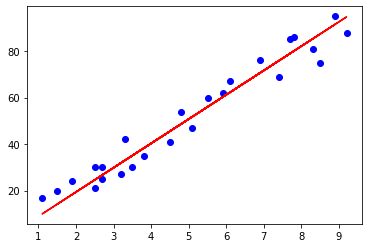

In [18]:
# Plotting the regression line
m = lr.coef_
c = lr.intercept_
line = m*X + c

# Plotting for the test data
plt.scatter(X, y, c ="b")
plt.plot(X, line, c="r");
plt.show()

# 6. Making prediction

In [19]:
# Testing data - In Hours
print(X_test)

[[1.1]
 [3.3]
 [1.9]
 [8.5]
 [4.8]]


In [20]:
# Predicting the scores
y_pred = lr.predict(X_test)

In [21]:
# Comparing Actual vs Predicted
prediction = pd.DataFrame({'Target': y_test, 'Predicted': y_pred})
prediction

,Target,Predicted
0,17,9.970262
1,42,32.984700
2,24,18.339148
3,75,87.382463
4,54,48.676362


In [22]:
hours = 9.25
my_pred = lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(my_pred[0]))

No of Hours = 9.25
Predicted Score = 95.22829438402952


# 7. Model Evaluation

In [23]:
# Evaluating the performance of algorithm.There are many such metrics. Here, we have chosen the mean square error.

from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('R2 Score:', r2_score(y_test, y_pred)) #R^2 for goodness of data

Mean Absolute Error: 7.882398086270432
R2 Score: 0.8421031525243527


# From our prediction, if students study 9.25 hrs/day they will score "95.22" marks.